In [ ]:
!pip install pydub
!apt-get install -y ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
!apt-get install -y ffmpeg
!pip install -q pydub
!pip install -q librosa numpy scipy matplotlib ipython
!pip install -q note_seq


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 63.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.7 MB/s eta 0:00:00


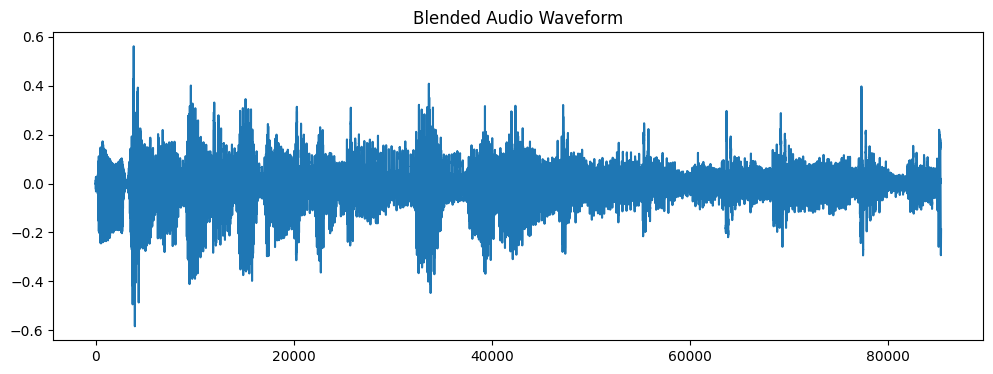

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio, display


guitar, sr1 = librosa.load(librosa.example('trumpet'), sr=16000)
piano, sr2 = librosa.load(librosa.example('fishin'), sr=16000)


min_len = min(len(guitar), len(piano))
guitar = guitar[:min_len]
piano = piano[:min_len]

# Blend them equally
blend = 0.5 * guitar + 0.5 * piano

# Plot blended waveform
plt.figure(figsize=(12, 4))
plt.title("Blended Audio Waveform")
plt.plot(blend)
plt.show()

# Play the resulting audio
display(Audio(blend, rate=16000))

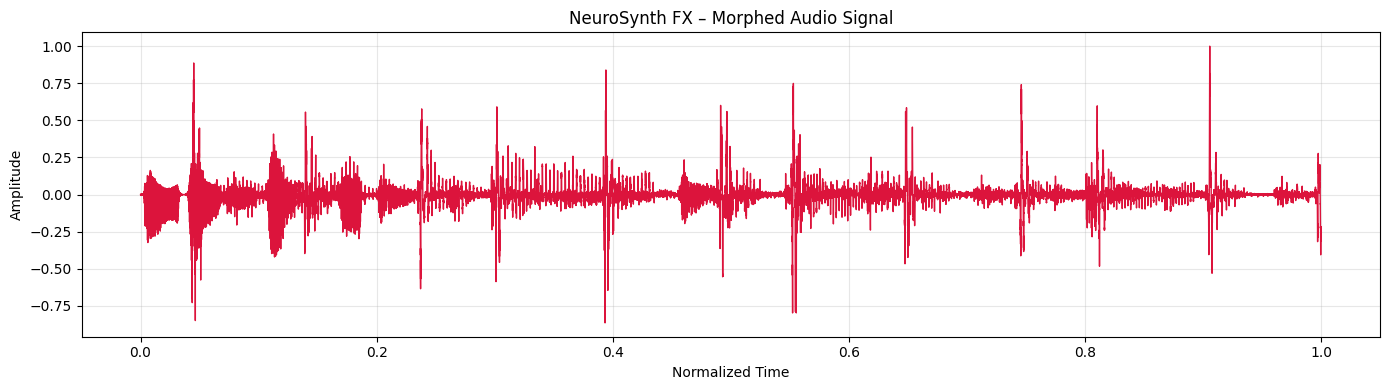

▶️ Playing synthesized NeuroSynth FX audio blend...


In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from IPython.display import Audio, display


source_1, sr1 = librosa.load(librosa.example('trumpet'), sr=16000)
source_2, sr2 = librosa.load(librosa.example('fishin'), sr=16000)


duration = min(len(source_1), len(source_2))
source_1 = source_1[:duration]
source_2 = source_2[:duration]


def envelope(signal):
    analytic_signal = hilbert(signal)
    amplitude_envelope = np.abs(analytic_signal)
    return amplitude_envelope / np.max(amplitude_envelope)

env1 = envelope(source_1)
env2 = envelope(source_2)


t = np.linspace(0, 1, duration)
morph_curve = 0.5 + 0.5 * np.sin(2 * np.pi * 0.5 * t)  # Oscillating morph factor

modulated_1 = source_1 * env1 * (1 - morph_curve)
modulated_2 = source_2 * env2 * morph_curve
blended_output = modulated_1 + modulated_2


blended_output /= np.max(np.abs(blended_output))


plt.figure(figsize=(14, 4))
plt.title("NeuroSynth FX – Morphed Audio Signal")
plt.plot(t, blended_output, color='crimson', linewidth=1)
plt.xlabel("Normalized Time")
plt.ylabel("Amplitude")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# === Step 7: Play the synthesized output === #
print("▶️ Playing synthesized NeuroSynth FX audio blend...")
display(Audio(blended_output, rate=16000))


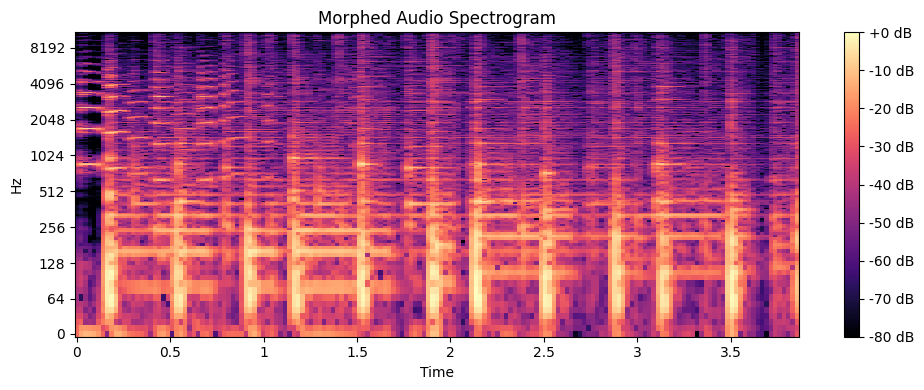

In [ ]:
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(blended_output)), ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('Morphed Audio Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


In [ ]:
import soundfile as sf
sf.write("neurosynth_output.wav", blended_output, 16000)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


interactive(children=(FloatSlider(value=0.5, description='Morph Level', max=1.0, step=0.01), Dropdown(descript…

✅ Files saved: neurosynth_output.wav and neurosynth_output_with_reverb.wav


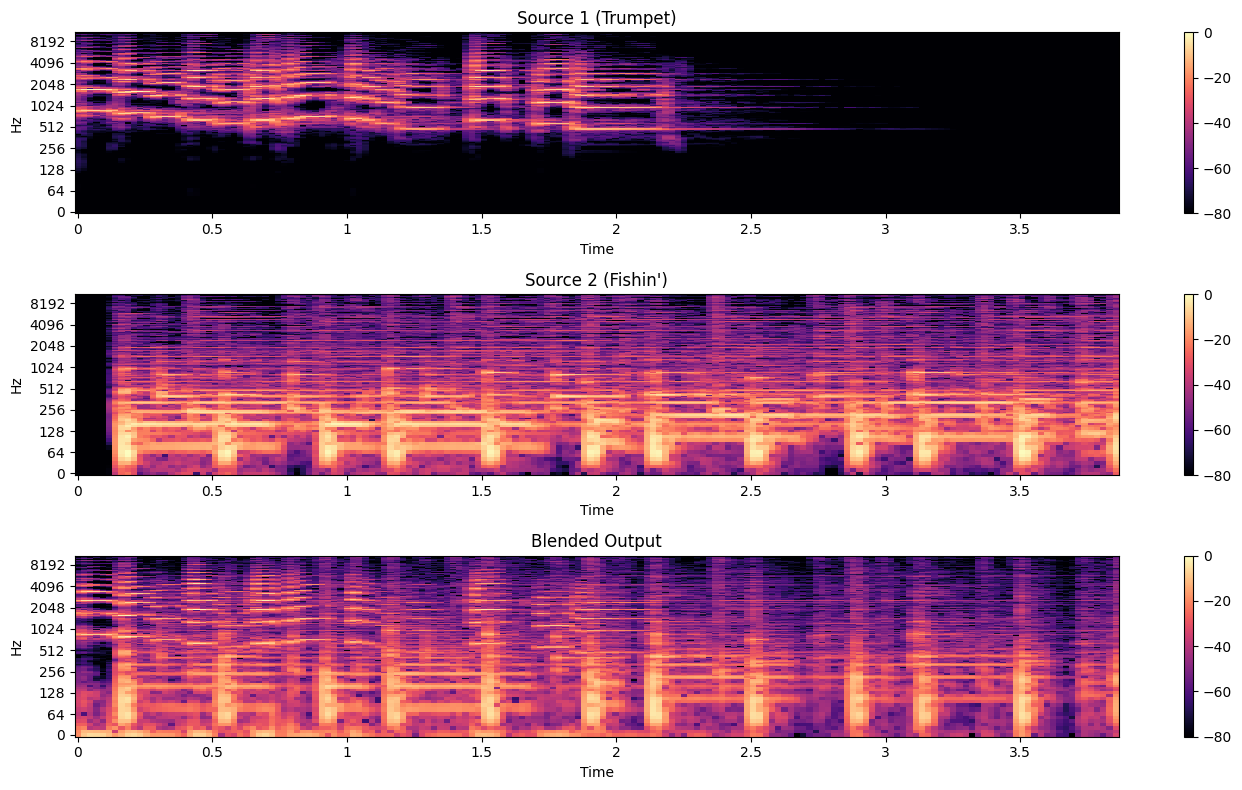

In [ ]:
# INSTALL NECESSARY TOOLS (if not already installed)
!pip install -q pydub librosa numpy scipy matplotlib ipython soundfile ipywidgets
!apt-get install -y ffmpeg

# IMPORT ALL THE TOOLS WE NEED
import numpy as np             # For math and number magic
import librosa                 # To load and play music/sounds
import matplotlib.pyplot as plt # To draw graphs and pictures
from IPython.display import Audio, display # To play audio in notebooks
from scipy.signal import hilbert            # For cool signal tricks
from ipywidgets import interact, FloatSlider, Dropdown # For sliders and dropdowns
import soundfile as sf         # To save audio files
from pydub import AudioSegment # To edit audio (like adding effects)

# === LOAD TWO SAMPLE SOUNDS ===
source_1, sr1 = librosa.load(librosa.example('trumpet'), sr=16000)  # Sound of a trumpet
source_2, sr2 = librosa.load(librosa.example('fishin'), sr=16000)    # Sound of a song called "fishin"

# === MAKE THEM SAME LENGTH ===
duration = min(len(source_1), len(source_2))  # Find the shorter one
source_1 = source_1[:duration]  # Cut the longer one to match
source_2 = source_2[:duration]  # So they can mix nicely

# === ENVELOPE: Find how loud each part is over time ===
def envelope(signal):
    analytic_signal = hilbert(signal)           # Magic trick to get more info about the sound
    amplitude_envelope = np.abs(analytic_signal) # How loud it is at every moment
    return amplitude_envelope / np.max(amplitude_envelope) # Make it easy to use

env1 = envelope(source_1)  # Get loudness pattern for trumpet
env2 = envelope(source_2)  # Get loudness pattern for fishin'

# === MORPH CURVE: Choose how to blend them over time ===
def get_morph_curve(duration, curve_type='sine'):
    t = np.linspace(0, 1, duration)  # A list from 0 to 1 that helps us move smoothly
    if curve_type == 'linear':
        return t  # Go straight from start to end
    elif curve_type == 'exponential':
        return t**2  # Start slow, go fast
    elif curve_type == 'logarithmic':
        return np.log1p(t * np.e) / np.log1p(np.e)  # Start fast, go slow
    elif curve_type == 'step':
        return np.where(t < 0.5, 0, 1)  # Jump suddenly halfway
    else:
        return 0.5 + 0.5 * np.sin(2 * np.pi * 0.5 * t)  # Like waves — up and down blending

# === ARTIFICIAL REVERB: Make it sound like in a big room ===
def apply_reverb(signal, reverb_strength=0.3):
    impulse_length = 8000
    impulse = np.zeros(impulse_length)
    impulse[0] = 1.0  # First sound you hear
    impulse[1000] = reverb_strength * 0.5  # Echo after 1000 samples
    impulse[2000] = reverb_strength * 0.3
    impulse[3000] = reverb_strength * 0.2
    reverbed_signal = np.convolve(signal, impulse, mode='same')  # Mix them together
    return reverbed_signal / np.max(np.abs(reverbed_signal))  # Keep volume nice

# === REAL-TIME MORPHING FUNCTION: Blend two sounds on the fly ===
def morph_audio(factor=0.5, curve_type='sine'):
    morph_curve = get_morph_curve(duration, curve_type)  # Decide how to blend
    modulated_1 = source_1 * env1 * (1 - morph_curve * factor)  # Less of trumpet
    modulated_2 = source_2 * env2 * (morph_curve * factor)      # More of fishin'
    blended = modulated_1 + modulated_2  # Mix them together
    blended /= np.max(np.abs(blended))   # Make sure it's not too loud

    print("🔊 Playing real-time morphed output...")
    display(Audio(blended, rate=16000))  # Play the new mixed sound

    # Save for later
    morph_audio.blended_output = blended

# === SLIDERS AND BUTTONS FOR INTERACTIVE CONTROL ===
interact(
    morph_audio,
    factor=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.5, description='Morph Level'),
    curve_type=Dropdown(options=['linear', 'exponential', 'logarithmic', 'step', 'sine'], value='sine', description='Curve Type')
);

# === DRAW THE SOUND PICTURES (SPECTROGRAMS) ===
try:
    final_audio = morph_audio.blended_output  # Get the final sound we made

    # Add fake reverb
    reverbed_audio = apply_reverb(final_audio)

    # Save both versions
    sf.write("neurosynth_output.wav", final_audio, sr1)
    sf.write("neurosynth_output_with_reverb.wav", reverbed_audio, sr1)
    print("✅ Files saved: neurosynth_output.wav and neurosynth_output_with_reverb.wav")

    # Draw pretty pictures of the sounds
    plt.figure(figsize=(14, 8))

    plt.subplot(3, 1, 1)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(source_1)), ref=np.max),
                             y_axis='log', x_axis='time')
    plt.title('Source 1 (Trumpet)')
    plt.colorbar()

    plt.subplot(3, 1, 2)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(source_2)), ref=np.max),
                             y_axis='log', x_axis='time')
    plt.title('Source 2 (Fishin\')')
    plt.colorbar()

    plt.subplot(3, 1, 3)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(final_audio)), ref=np.max),
                             y_axis='log', x_axis='time')
    plt.title('Blended Output')
    plt.colorbar()

    plt.tight_layout()
    plt.show()

except AttributeError:
    print("⚠️ No valid audio generated yet. Please run the morphing slider first.")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
🎺 Source 1: Trumpet | 🎸 Source 2: Fishin'


interactive(children=(FloatSlider(value=0.5, description='Morph Level', layout=Layout(width='400px'), max=1.0,…

✅ Files saved: neurosynth_output.wav and neurosynth_output_with_reverb.wav


<ipython-input-10-1866235543dc>:137: UserWarning: Glyph 127930 (\N{TRUMPET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-1866235543dc>:137: UserWarning: Glyph 127928 (\N{GUITAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-1866235543dc>:137: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127930 (\N{TRUMPET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127928 (\N{GUITAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


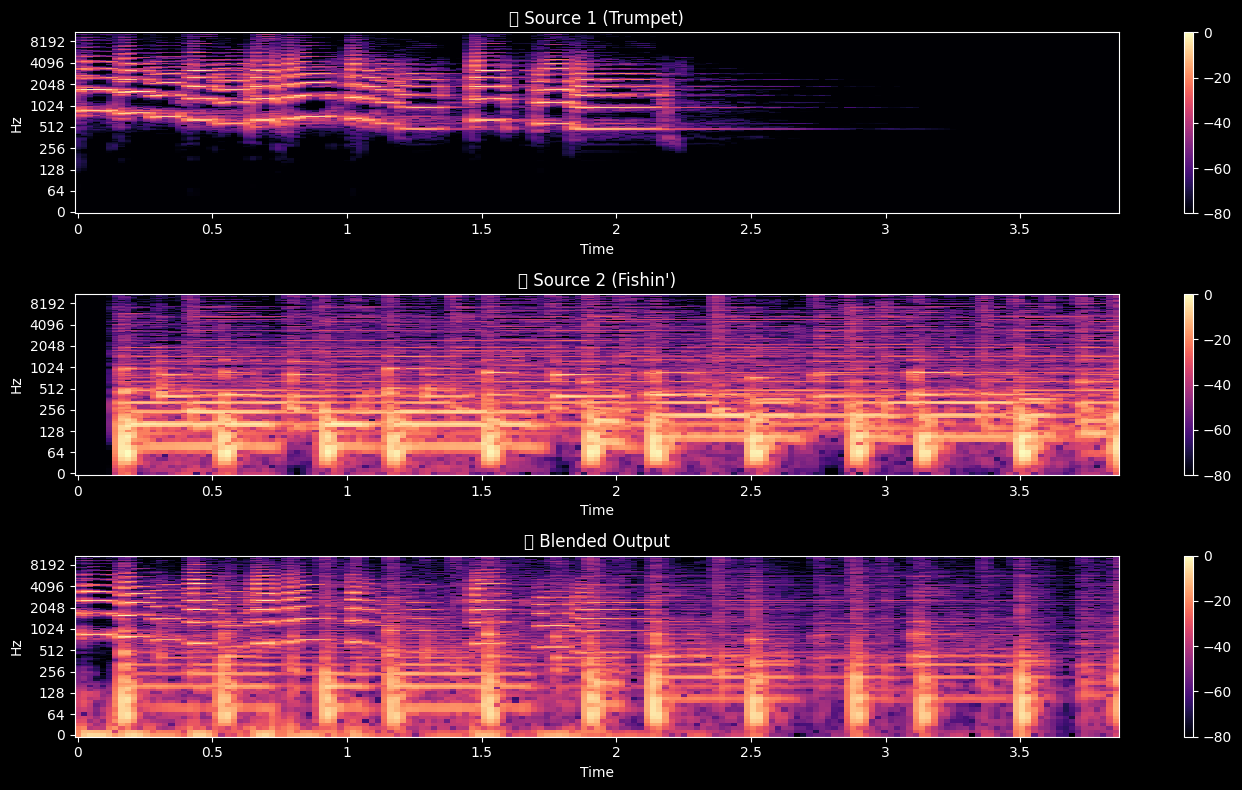

In [ ]:
# INSTALL NECESSARY TOOLS (if not already installed)
!pip install -q pydub librosa numpy scipy matplotlib ipython soundfile ipywidgets
!apt-get install -y ffmpeg

# IMPORT ALL THE TOOLS WE NEED
import numpy as np             # For math and number magic
import librosa                 # To load and play music/sounds
import matplotlib.pyplot as plt # To draw graphs and pictures
from IPython.display import Audio, display, clear_output  # To play audio + refresh output
from scipy.signal import hilbert            # For cool signal tricks
from ipywidgets import interact, FloatSlider, Dropdown, Layout  # For styled sliders/dropdowns
import soundfile as sf         # To save audio files
from pydub import AudioSegment # To edit audio (like adding effects)

# Set dark background style for plots
plt.style.use('dark_background')

# === LOAD TWO SAMPLE SOUNDS ===
source_1, sr1 = librosa.load(librosa.example('trumpet'), sr=16000)  # Sound of a trumpet
source_2, sr2 = librosa.load(librosa.example('fishin'), sr=16000)    # Sound of a song called "fishin"

# === MAKE THEM SAME LENGTH ===
duration = min(len(source_1), len(source_2))  # Find the shorter one
source_1 = source_1[:duration]  # Cut the longer one to match
source_2 = source_2[:duration]  # So they can mix nicely

# === ENVELOPE: Find how loud each part is over time ===
def envelope(signal):
    analytic_signal = hilbert(signal)           # Magic trick to get more info about the sound
    amplitude_envelope = np.abs(analytic_signal) # How loud it is at every moment
    return amplitude_envelope / np.max(amplitude_envelope) # Make it easy to use

env1 = envelope(source_1)  # Get loudness pattern for trumpet
env2 = envelope(source_2)  # Get loudness pattern for fishin'

# === MORPH CURVE: Choose how to blend them over time ===
def get_morph_curve(duration, curve_type='sine'):
    t = np.linspace(0, 1, duration)  # A list from 0 to 1 that helps us move smoothly
    if curve_type == 'linear':
        return t  # Go straight from start to end
    elif curve_type == 'exponential':
        return t**2  # Start slow, go fast
    elif curve_type == 'logarithmic':
        return np.log1p(t * np.e) / np.log1p(np.e)  # Start fast, go slow
    elif curve_type == 'step':
        return np.where(t < 0.5, 0, 1)  # Jump suddenly halfway
    else:
        return 0.5 + 0.5 * np.sin(2 * np.pi * 0.5 * t)  # Like waves — up and down blending

# === ARTIFICIAL REVERB: Make it sound like in a big room ===
def apply_reverb(signal, reverb_strength=0.3):
    impulse_length = 8000
    impulse = np.zeros(impulse_length)
    impulse[0] = 1.0  # First sound you hear
    impulse[1000] = reverb_strength * 0.5  # Echo after 1000 samples
    impulse[2000] = reverb_strength * 0.3
    impulse[3000] = reverb_strength * 0.2
    reverbed_signal = np.convolve(signal, impulse, mode='same')  # Mix them together
    return reverbed_signal / np.max(np.abs(reverbed_signal))  # Keep volume nice

# === REAL-TIME MORPHING FUNCTION: Blend two sounds on the fly ===
def morph_audio(factor=0.5, curve_type='sine'):
    morph_curve = get_morph_curve(duration, curve_type)  # Decide how to blend
    modulated_1 = source_1 * env1 * (1 - morph_curve * factor)  # Less of trumpet
    modulated_2 = source_2 * env2 * (morph_curve * factor)      # More of fishin'
    blended = modulated_1 + modulated_2  # Mix them together
    blended /= np.max(np.abs(blended))   # Make sure it's not too loud

    print("🔊 Playing real-time morphed output...")
    display(Audio(blended, rate=16000))  # Play the new mixed sound

    # Save for later
    morph_audio.blended_output = blended

    # Clear previous graph and show live waveform
    clear_output(wait=True)
    display(Audio(blended, rate=16000))

    plt.figure(figsize=(10, 2))
    plt.plot(blended[:5000], color='crimson')
    plt.title("🎶 Live Blended Waveform")
    plt.axis('off')
    plt.show()

# === SLIDERS AND BUTTONS FOR INTERACTIVE CONTROL ===
print("🎺 Source 1: Trumpet | 🎸 Source 2: Fishin'")
interact(
    morph_audio,
    factor=FloatSlider(
        min=0.0, max=1.0, step=0.01, value=0.5,
        description='Morph Level',
        style={'description_width': 'initial', 'handle_color': '#FF9800'},
        layout=Layout(width='400px')
    ),
    curve_type=Dropdown(
        options=['linear', 'exponential', 'logarithmic', 'step', 'sine'],
        value='sine',
        description='Blend Curve',
        style={'description_width': 'initial'},
        layout=Layout(width='300px')
    )
);

# === DRAW THE SOUND PICTURES (SPECTROGRAMS) ===
try:
    final_audio = morph_audio.blended_output  # Get the final sound we made

    # Add fake reverb
    reverbed_audio = apply_reverb(final_audio)

    # Save both versions
    sf.write("neurosynth_output.wav", final_audio, sr1)
    sf.write("neurosynth_output_with_reverb.wav", reverbed_audio, sr1)
    print("✅ Files saved: neurosynth_output.wav and neurosynth_output_with_reverb.wav")

    # Draw pretty pictures of the sounds
    plt.figure(figsize=(14, 8))

    plt.subplot(3, 1, 1)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(source_1)), ref=np.max),
                             y_axis='log', x_axis='time')
    plt.title('🎺 Source 1 (Trumpet)')
    plt.colorbar()

    plt.subplot(3, 1, 2)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(source_2)), ref=np.max),
                             y_axis='log', x_axis='time')
    plt.title('🎸 Source 2 (Fishin\')')
    plt.colorbar()

    plt.subplot(3, 1, 3)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(final_audio)), ref=np.max),
                             y_axis='log', x_axis='time')
    plt.title('🎧 Blended Output')
    plt.colorbar()

    plt.tight_layout()
    plt.show()

except AttributeError:
    print("⚠️ No valid audio generated yet. Please run the morphing slider first.")